# **Project Name**    - **Retail Sales Prediction**



### Import Libraries

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from pandas import datetime as dt
import datetime
import missingno as msno


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

# Importing Libraries For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats



# Importing Libraries For ML Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [4]:
# Load Dataset
sales_data = pd.read_csv('Rossmann Stores Data (2).csv')
store_data = pd.read_csv('store.csv')

### Dataset First View

In [5]:
# Dataset First Look
sales_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Dataset Second View

In [6]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Merging Datasets

In [7]:
df = sales_data.merge(store_data,how='inner',left_on='Store',right_on='Store')  ## We did inner join on these 2 datasets on the Store column

In [8]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
df.shape

(1017209, 18)

There are 1017209 rows and 18 columns in our dataset

### Dataset Information

In [10]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Length: 1017209, dtype: bool

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [13]:
## Converting the Date Column Data Type To DateTime 
df["Date"]=pd.to_datetime(df["Date"])

In [14]:
# Extracting Date,Year,Month,Day
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day

In [15]:
# as we extracted year,month,day from date columns so here we dropping the date column
df=df.drop(['Date'],axis=1) 
df=df.drop(['PromoInterval'],axis=1)
df=df.drop(['StateHoliday'],axis=1)
df=df.drop(['Open'],axis=1)

In [16]:
df.head(5)

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
0,1,5,5263,555,1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,2015,7,31
1,1,4,5020,546,1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,2015,7,30
2,1,3,4782,523,1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,2015,7,29
3,1,2,5011,560,1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,2015,7,28
4,1,1,6102,612,1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,2015,7,27


### Handling Null Values

In [17]:
df.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Promo                             0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
Year                              0
Month                             0
Day                               0
dtype: int64

In [18]:
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace = True)
df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [19]:
df['Promo2SinceWeek'].fillna(0, inplace = True)
df['Promo2SinceYear'].fillna(0, inplace = True)

We may have to drop these last 3 columns, Promo2SinceWeek, Promo2SinceYear, PromoInterval because they have around 50% of null values, but these null values shows that stores are not actually participating in promo2 that's why there are null values, so we have to replace it with 0

In [20]:
df.isnull().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Promo                        0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
Year                         0
Month                        0
Day                          0
dtype: int64

<AxesSubplot:>

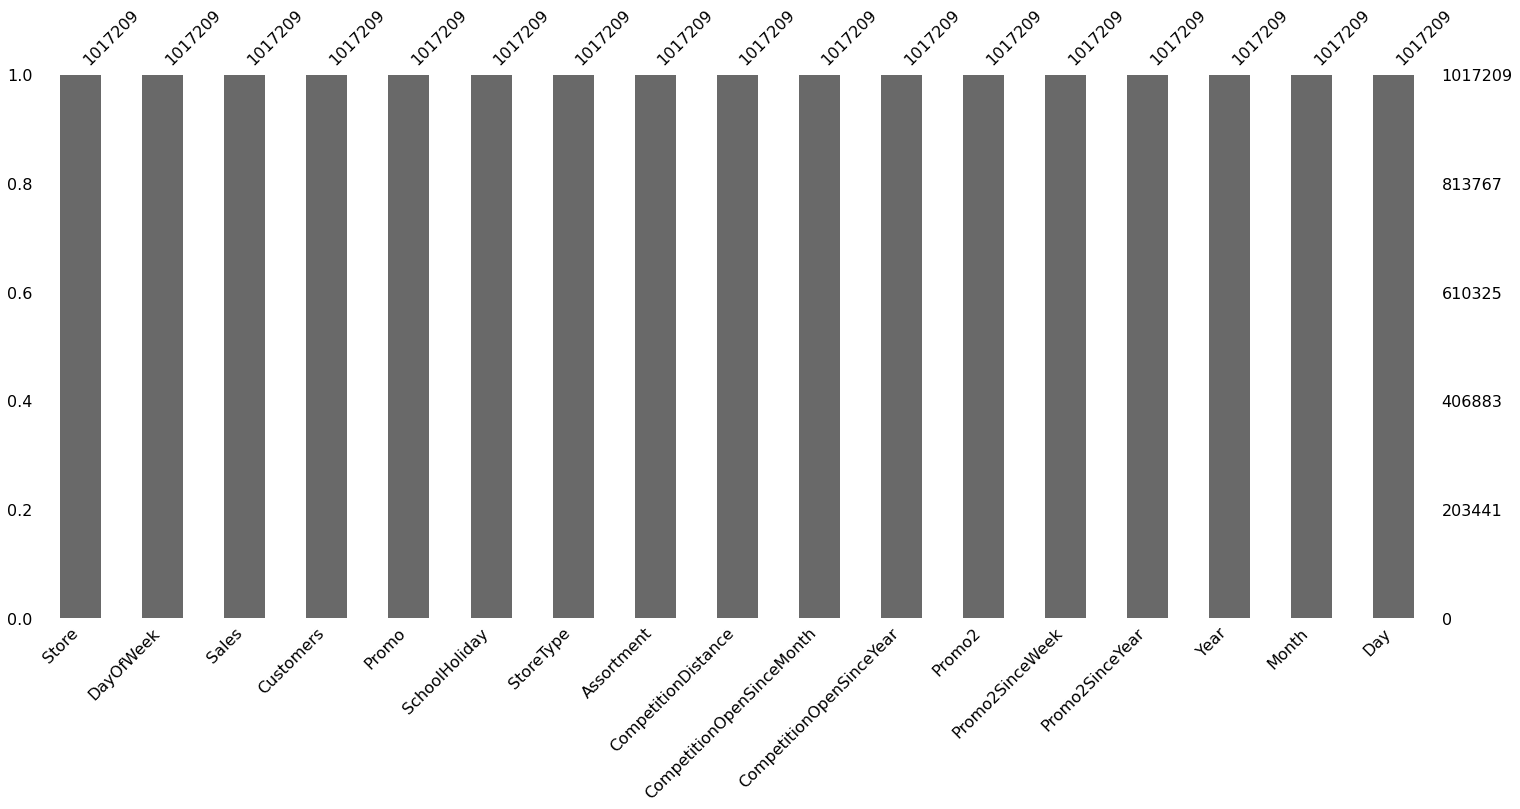

In [21]:
msno.bar(df)   #After handling missing values

In [22]:
df.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
0,1,5,5263,555,1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,31
1,1,4,5020,546,1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,30
2,1,3,4782,523,1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,29
3,1,2,5011,560,1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,28
4,1,1,6102,612,1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,27


In [23]:
df.shape

(1017209, 17)

### Variables Description 
We have handled all the null values in our dataset, and created new variables using date column.

There are 20 variables in our dataset till now, and we can see that there are few categorical variables, so we may look forward to apply one hot encoding in the future for these variables. 

There are 16 Numerical columns and 4 categorical columns at present.

### Check Unique Values for each variable.

In [24]:
# Check Unique Values for each variable.
variables_in_df = df.columns.to_list()

In [25]:
for i in variables_in_df:
  print('The Unique Values of', i, 'are:', df[i].unique())

The Unique Values of Store are: [   1    2    3 ... 1113 1114 1115]
The Unique Values of DayOfWeek are: [5 4 3 2 1 7 6]
The Unique Values of Sales are: [ 5263  5020  4782 ... 20362 18841 21237]
The Unique Values of Customers are: [ 555  546  523 ... 3727 4022 4106]
The Unique Values of Promo are: [1 0]
The Unique Values of SchoolHoliday are: [1 0]
The Unique Values of StoreType are: ['c' 'a' 'd' 'b']
The Unique Values of Assortment are: ['a' 'c' 'b']
The Unique Values of CompetitionDistance are: [1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3

## 3. ***Data Wrangling***

### Data Wrangling Code

In [26]:
# Write your code to make your dataset analysis ready.
df.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
0,1,5,5263,555,1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,31
1,1,4,5020,546,1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,30
2,1,3,4782,523,1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,29
3,1,2,5011,560,1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,28
4,1,1,6102,612,1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,27


In [27]:
df[df['Promo2'] != 0]

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
942,2,5,6064,625,1,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,2015,7,31
943,2,4,5567,601,1,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,2015,7,30
944,2,3,6402,727,1,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,2015,7,29
945,2,2,5671,646,1,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,2015,7,28
946,2,1,6627,638,1,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,2013,1,5
1017205,1115,5,4540,326,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,2013,1,4
1017206,1115,4,4297,300,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,2013,1,3
1017207,1115,3,3697,305,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,2013,1,2


### Here we have created new column called "PromoOpen" from existing columns to measure more accurate period(in Months) from when the store was participating in the Promo2.

In [28]:
df[['Promo','Promo2','Promo2SinceYear', 'Promo2SinceWeek']].sample(10)

,Promo,Promo2,Promo2SinceYear,Promo2SinceWeek
136448,0,0,0.0,0.0
555187,0,0,0.0,0.0
394385,0,0,0.0,0.0
30389,0,0,0.0,0.0
74437,1,1,2009.0,37.0
611217,0,1,2010.0,39.0
786387,0,0,0.0,0.0
857951,0,1,2011.0,18.0
535914,0,0,0.0,0.0
397779,1,1,2010.0,50.0


In [29]:
df.iloc[240267] ##This shows large number of promoopen shows us that this store has never opted for second promotion that's why number of months are so high,
## Same Concepts applied for all the stores with big promoOpen values  
##df["PromoOpen"] = (12* (df["Year"]-df["Promo2SinceYear"])) + df["Month"]-((df["Promo2SinceWeek"]/4))

Store                           265
DayOfWeek                         2
Sales                          8928
Customers                       706
Promo                             1
SchoolHoliday                     0
StoreType                         a
Assortment                        a
CompetitionDistance          4580.0
CompetitionOpenSinceMonth       9.0
CompetitionOpenSinceYear     2013.0
Promo2                            1
Promo2SinceWeek                14.0
Promo2SinceYear              2015.0
Year                           2014
Month                            12
Day                              16
Name: 240267, dtype: object

In [30]:
df.iloc[1]
#(12* (df["Year"]-df["Promo2SinceYear"])) + df["Month"]-((df["Promo2SinceWeek"]/4))

Store                             1
DayOfWeek                         4
Sales                          5020
Customers                       546
Promo                             1
SchoolHoliday                     1
StoreType                         c
Assortment                        a
CompetitionDistance          1270.0
CompetitionOpenSinceMonth       9.0
CompetitionOpenSinceYear     2008.0
Promo2                            0
Promo2SinceWeek                 0.0
Promo2SinceYear                 0.0
Year                           2015
Month                             7
Day                              30
Name: 1, dtype: object

In [31]:
# Creating New Column From Existing Columns
df["CompetitionOpen"] = (12* (df["Year"]-df["CompetitionOpenSinceYear"])) + (df["Month"]-df["CompetitionOpenSinceMonth"])

Here we have created new column called "CompetitionOpen" from existing columns to measure the period(in months) from whem the nearest competition has opened

In [32]:
#Lets Check Our Columns
df[['CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(10)

,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
210433,13570.0,2010.0,5.0,32.0
611562,240.0,2002.0,9.0,146.0
619965,620.0,2013.0,9.0,10.0
535412,330.0,2006.0,9.0,78.0
369005,1080.0,2008.0,4.0,87.0
474074,6900.0,2013.0,9.0,2.0
352564,210.0,2013.0,9.0,11.0
839032,840.0,2006.0,9.0,76.0
753360,250.0,2005.0,1.0,99.0
462887,1280.0,2013.0,9.0,16.0


In [33]:
# Checking CompetitionOpen Negative figures 
df[df["CompetitionOpen"]<0].head(10)

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,CompetitionOpen
3890,5,2,7692,659,1,0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,2015,3,31,-1.0
3891,5,1,8847,770,1,0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,2015,3,30,-1.0
3892,5,7,0,0,0,0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,2015,3,29,-1.0
3893,5,6,2038,219,0,0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,2015,3,28,-1.0
3894,5,5,4181,499,0,0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,2015,3,27,-1.0
3895,5,4,3711,460,0,0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,2015,3,26,-1.0
3896,5,3,4325,613,0,0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,2015,3,25,-1.0
3897,5,2,4073,537,0,0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,2015,3,24,-1.0
3898,5,1,4028,540,0,0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,2015,3,23,-1.0
3899,5,7,0,0,0,0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,2015,3,22,-1.0


In [34]:
df['CompetitionOpen'].value_counts()

6.0       17418
4.0       17377
8.0       17348
7.0       17074
9.0       16853
          ...  
199.0        28
1357.0       28
628.0        28
1369.0       28
616.0        28
Name: CompetitionOpen, Length: 367, dtype: int64

### Here CompetitionOpen column has figures in negative which indicates that the store do not have any competition. So we have replace those negative figures with zero

In [35]:
# now we can remove the CompetitionOpenSinceMonth	CompetitionOpenSinceYear	Promo2	Promo2SinceWeek	Promo2SinceYear

In [36]:
df.drop(['CompetitionOpenSinceMonth',	'CompetitionOpenSinceYear',	'Promo2',	'Promo2SinceWeek'	,'Promo2SinceYear'], axis= 1, inplace = True)

In [37]:
df.isnull().sum()

Store                  0
DayOfWeek              0
Sales                  0
Customers              0
Promo                  0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Year                   0
Month                  0
Day                    0
CompetitionOpen        0
dtype: int64

- Null Hypothesis - There is no relation between PromoOpen and Sales
- Alternate Hypothesis - There is a relationship between promoOpen and sales

#### 2. Perform an appropriate statistical test.

##### What all outlier treatment techniques have you used and why did you use those techniques?

we have used the IQR method to do the outlier treatment, because there where too many outliers present, for which log transformation is not an appropriate method 

- The interquartile range (IQR) is a measure of dispersion that is used to identify and handle outliers in a dataset. It is defined as the difference between the 75th percentile and the 25th percentile of the data, and it is a robust measure of dispersion that is not affected by outliers.

### 3. Categorical Encoding

In [38]:
df2 = pd.get_dummies(df, drop_first = True)
##pd.get_dummies() help you to do onehot encoding in single line of code, 
##and we do drop first = true to prevent some dummy values and errors, so in below code cng is gone to prevent
## it from dummy var trap

In [39]:
df2.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,Year,Month,Day,CompetitionOpen,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,5263,555,1,1,1270.0,2015,7,31,82.0,0,1,0,0,0
1,1,4,5020,546,1,1,1270.0,2015,7,30,82.0,0,1,0,0,0
2,1,3,4782,523,1,1,1270.0,2015,7,29,82.0,0,1,0,0,0
3,1,2,5011,560,1,1,1270.0,2015,7,28,82.0,0,1,0,0,0
4,1,1,6102,612,1,1,1270.0,2015,7,27,82.0,0,1,0,0,0


In [40]:
#Not needed for this project

#### 9. Part of speech tagging

In [41]:
#Not needed for this project

#### 10. Text Vectorization

In [42]:
#Not needed for this project

##### Which text vectorization technique have you used and why?

Not needed for this project

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [43]:
# Manipulate Features to minimize feature correlation and create new features
#This involved selecting a subset of the available features to use in the model. This helped us to reduce complexity and improve the interpretability of the model, as well as potentially improving its performance.
#We have already completed feature manipulation above in this colab notebook and created 2 new features called PromoOpen and CompetitionOpen

#### 2. Feature Selection

In [44]:
# Select your features wisely to avoid overfitting
df2.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,Year,Month,Day,CompetitionOpen,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,5263,555,1,1,1270.0,2015,7,31,82.0,0,1,0,0,0
1,1,4,5020,546,1,1,1270.0,2015,7,30,82.0,0,1,0,0,0
2,1,3,4782,523,1,1,1270.0,2015,7,29,82.0,0,1,0,0,0
3,1,2,5011,560,1,1,1270.0,2015,7,28,82.0,0,1,0,0,0
4,1,1,6102,612,1,1,1270.0,2015,7,27,82.0,0,1,0,0,0


In [45]:
numerical_variables = ['Customers', 'CompetitionDistance', 'CompetitionOpen']
categorical_variables = df2.columns.to_list()
categorical_variables

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'Year',
 'Month',
 'Day',
 'CompetitionOpen',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_b',
 'Assortment_c']

In [46]:
for i in numerical_variables:
  categorical_variables.remove(i)


In [47]:
categorical_variables.remove('Sales')

In [48]:
categorical_variables

['Store',
 'DayOfWeek',
 'Promo',
 'SchoolHoliday',
 'Year',
 'Month',
 'Day',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_b',
 'Assortment_c']

In [49]:
print('Numerical Variables are', numerical_variables)
print('Categorical Variables are', categorical_variables)

Numerical Variables are ['Customers', 'CompetitionDistance', 'CompetitionOpen']
Categorical Variables are ['Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'Year', 'Month', 'Day', 'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c']


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [50]:
final_df = df2

<AxesSubplot:ylabel='Density'>

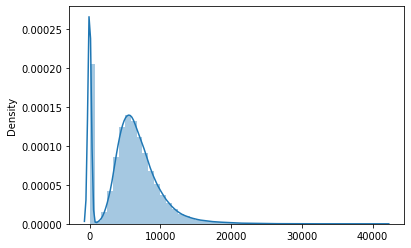

In [51]:
sns.distplot(x=final_df['Sales'])


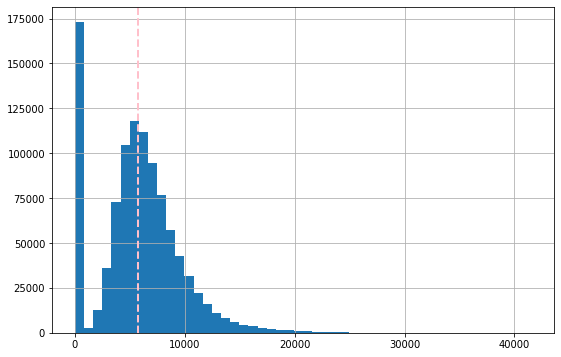

In [52]:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  final_df['Sales'].hist(bins=50, ax = ax)
  ax.axvline(final_df['Sales'].mean(), color = 'pink',linestyle='dashed', linewidth=2)


In [53]:
final_df[final_df['Sales'] == float('-inf')]

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,Year,Month,Day,CompetitionOpen,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c


In [54]:
final_df.drop(final_df[final_df['Sales'] == float('-inf')].index, inplace=True)

In [55]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Sales                1017209 non-null  int64  
 3   Customers            1017209 non-null  int64  
 4   Promo                1017209 non-null  int64  
 5   SchoolHoliday        1017209 non-null  int64  
 6   CompetitionDistance  1017209 non-null  float64
 7   Year                 1017209 non-null  int64  
 8   Month                1017209 non-null  int64  
 9   Day                  1017209 non-null  int64  
 10  CompetitionOpen      1017209 non-null  float64
 11  StoreType_b          1017209 non-null  uint8  
 12  StoreType_c          1017209 non-null  uint8  
 13  StoreType_d          1017209 non-null  uint8  
 14  Assortment_b         1017209 non-null  uint8  
 15

In [56]:
final_df.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,Year,Month,Day,CompetitionOpen,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,5263,555,1,1,1270.0,2015,7,31,82.0,0,1,0,0,0
1,1,4,5020,546,1,1,1270.0,2015,7,30,82.0,0,1,0,0,0
2,1,3,4782,523,1,1,1270.0,2015,7,29,82.0,0,1,0,0,0
3,1,2,5011,560,1,1,1270.0,2015,7,28,82.0,0,1,0,0,0
4,1,1,6102,612,1,1,1270.0,2015,7,27,82.0,0,1,0,0,0


In [57]:
categorical_variables

['Store',
 'DayOfWeek',
 'Promo',
 'SchoolHoliday',
 'Year',
 'Month',
 'Day',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_b',
 'Assortment_c']

In [58]:
numerical_variables

['Customers', 'CompetitionDistance', 'CompetitionOpen']

### 6. Data Scaling

In [59]:
# Scaling your data
for i in numerical_variables:
  categorical_variables.append(i)
X = final_df[categorical_variables]
X

,Store,DayOfWeek,Promo,SchoolHoliday,Year,Month,Day,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Customers,CompetitionDistance,CompetitionOpen
0,1,5,1,1,2015,7,31,0,1,0,0,0,555,1270.0,82.0
1,1,4,1,1,2015,7,30,0,1,0,0,0,546,1270.0,82.0
2,1,3,1,1,2015,7,29,0,1,0,0,0,523,1270.0,82.0
3,1,2,1,1,2015,7,28,0,1,0,0,0,560,1270.0,82.0
4,1,1,1,1,2015,7,27,0,1,0,0,0,612,1270.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,0,1,2013,1,5,0,0,1,0,1,339,5350.0,-8.0
1017205,1115,5,0,1,2013,1,4,0,0,1,0,1,326,5350.0,-8.0
1017206,1115,4,0,1,2013,1,3,0,0,1,0,1,300,5350.0,-8.0
1017207,1115,3,0,1,2013,1,2,0,0,1,0,1,305,5350.0,-8.0


In [60]:
y = final_df['Sales']

In [61]:
numerical_cols = ['Customers','CompetitionDistance','Year','Month','DayOfWeek','Day','CompetitionOpen']
scaler = MinMaxScaler()
scaler.fit(final_df[numerical_cols])
final_df[numerical_cols] = scaler.transform(final_df[numerical_cols])

##### Which method have you used to scale you data and why?

- MinMax scaler will convert the data standardization 

### 7. Data Splitting

In [62]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(813767, 15)
(203442, 15)


##### What data splitting ratio have you used and why? 

- training set - 80% 
- test set - 20%
### because we want to go by the standard norms 

## ***7. ML Model Implementation***

In [63]:

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### ML Model - 1 - Linear Regression

In [64]:
def Calculating_errors(y_train,y_pred_train,y_test,y_test_pred):
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is" ,MSE_test)
  MSE_train  = mean_squared_error(y_train, y_pred_train)
  print("MSE on train is" ,MSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is" ,RMSE_test)
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is" ,RMSE_train)
  print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred_train)))
  print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

### ML Model - 4 - RandomForestRegression

In [65]:
rf = RandomForestRegressor()

In [66]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [67]:
print(f"The r2 score for testing is {round(r2_score(y_test,rf.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,rf.predict(X_train)),4)}")

The r2 score for testing is 0.9857
The r2 score for training is 0.998


In [78]:
new_data=np.array([(3, #store
                    2, #dayofweek
                    1, #promo
                    0, #schoolholiday
                    2033, #year
                    7, #month
                    31, #day
                    0,#storeb
                    0,#storec
                    1,#stored
                    0, #assortment b
                    1, #assortment c
                    570,#cust
                    1270, #compdist
                    73, #compopen 
                    )])

In [79]:
new_data=scaler.transform(new_data)

In [80]:
rf.predict(new_data)

array([7242.5])

#### Which Evaluation metrics did you consider for a positive business impact and why?

Here we got r2 score of 96.8% for testing data which means that business can predict their future sales with 96.8% accuracy.

###  Which ML model did you choose from the above created models as your final

### prediction model and why?

Here we got best accuracy from Random Forest Regression. So this model could help businesses to predict their future sales data.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [74]:
import joblib
# save the model to disk
filename = 'rf.sav'
joblib.dump(rf, filename)

['rf.sav']

In [73]:
# Save the File
import pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.

In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The Rossmann dataset is a large dataset of sales data for a chain of German pharmacies. The dataset includes over a million rows of data, with various features such as store location, type of product sold, and various sales metrics.
In a machine learning project using the Rossmann dataset, you would likely start by exploring the data and trying to understand the relationships between different features and sales outcomes. You might also want to perform some data cleaning and preprocessing to ensure that the data is ready for modeling.
Once you have prepared the data, you could use a variety of machine learning algorithms to build models that predict sales outcomes based on the available features. Some common approaches might include linear regression, decision trees, or random forests. You could also use more advanced techniques such as gradient boosting or neural networks whcih are beyond the scope of this present project and surely be included in future.
Ultimately, the conclusion of a machine learning project using the Rossmann dataset would depend on the specific goals and objectives of the project. However, a common goal might be to build a model that is able to accurately predict sales outcomes based on the available features, and to use that model to make informed decisions about how to optimize sales and improve business performance.


### ***Hurrah! We have successfully completed our Machine Learning Capstone Project !!!***